# **Heart Failure Prediction**

# **Problem** **Statement**
Heart failure is a serious condition where the heart struggles to pump blood efficiently, often leading to severe health complications or even death if not managed properly. Early prediction of heart failure risk can significantly improve patient outcomes by enabling timely medical intervention. This project aims to leverage patient health data, such as age, blood pressure, cholesterol levels, and other vital indicators, to predict the likelihood of heart failure. By building an accurate predictive model, we hope to assist healthcare providers in identifying at-risk individuals and applying preventive measures accordingly.

# **Objective**
The objective of this project is to analyze patient health data to understand factors influencing heart failure, preprocess and engineer features for model readiness, and build a predictive model to accurately assess heart failure risk. The goal is to derive actionable insights and recommendations to aid in early intervention for at-risk individuals.

# **Dataset Overview**
The Heart Failure Prediction dataset, sourced from Kaggle, contains various medical and demographic indicators used to assess the risk of heart failure. Key features include age, cholesterol levels, blood pressure, smoking status, and other vital health metrics, with the target variable indicating the presence or absence of heart failure. This dataset provides an opportunity to explore relationships between health indicators and heart failure risk, and it supports the development of predictive models to assist in preventive healthcare efforts.

# **Steps Involved**
1. Data Collection
Source: Collect real estate data from reliable platforms like Zillow, Realtor, or public government housing data repositories.
Methods: Use web scraping techniques, APIs, or access open-source datasets to gather relevant data.
Considerations: Ensure data includes essential features like price, square footage, number of bedrooms and bathrooms, neighborhood, and year built for effective analysis.
2. Data Preprocessing
Handling Missing Values: Use imputation methods like mean/median filling or remove rows with missing data, depending on the data quality and missing rate.
Encoding Categorical Data: Convert categorical features (e.g., "Neighborhood") into numerical values using One-Hot Encoding or Label Encoding to make them compatible with ML models.
Scaling/Normalization: Standardize numerical features such as "Square Feet" and "Price" for uniformity, using techniques like Min-Max scaling or Z-score normalization.
Outlier Detection: Identify and handle outliers in features that may skew results. Use methods such as IQR or Z-score to detect anomalies in features like price and square footage.
3. Data Analysis
Exploratory Data Analysis (EDA): Conduct an in-depth EDA to uncover relationships and patterns between variables. Investigate feature distributions and assess the data quality.
Price Distribution Analysis: Analyze how prices vary by key attributes like the number of bedrooms, square footage, and neighborhood.
Correlation Analysis: Calculate correlation coefficients to identify features that have the strongest relationship with the target variable (price).
4. Data Visualization
Price Distribution: Use histograms to visualize the distribution of prices across the dataset.
Feature vs. Price Relationships: Create scatter plots to examine the relationships between price and individual features (e.g., price vs. square footage, bedrooms, bathrooms).
Heatmap: Use a heatmap to visualize correlations among all features, identifying which features are most related to the target variable.
Box Plots: Generate box plots for continuous features to analyze spread and detect potential outliers.
5. Model Selection and Evaluation
Data Split: Divide the dataset into training and testing sets (e.g., 80% for training, 20% for testing).
Model Selection: Choose and implement different regression models to predict real estate prices, including:
Linear Regression
Decision Tree Regression
Random Forest Regression
Gradient Boosting Regressor
XGBoost
Evaluation Metrics: Evaluate model performance using:
Mean Absolute Error (MAE)
Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)
R-squared (R²) Score to measure model accuracy and error.

# **Tools and Techniques**

**Data Preprocessing Tools**

Pandas: Utilize for efficient data manipulation, cleaning, and handling missing values.
Scikit-learn: Use for encoding categorical data, scaling features, and splitting datasets.

**Data Analysis Techniques**

Correlation Analysis: Identify relationships between features to understand their impact on price prediction.
Descriptive Statistics: Summarize data with measures like mean, median, and standard deviation to grasp the data’s central tendencies and variability.

**Visualization Tools**

Matplotlib: Create foundational graphs and plots to support data analysis.
Seaborn: Use for enhanced, attractive visualizations like heatmaps and box plots.
Plotly: Implement for interactive data visualization, allowing deeper exploration of patterns and trends.

# **Problem Framing**
This project is framed as a supervised classification task where the goal is to predict the likelihood of heart failure based on various health indicators (e.g., age, blood pressure, cholesterol, smoking status). By analyzing these features, we aim to identify at-risk individuals and provide insights into factors contributing to heart failure.

# **Data Splitting**
The data will be split into training (80%) and testing (20%) sets using the train_test_split function from Scikit-learn. This split will enable us to train the model on a majority of the data while preserving a subset for unbiased performance evaluation.

# **Timeline**
Data Collection & Preprocessing: 1 week
Exploratory Data Analysis & Visualization: 1 week
Modeling & Evaluation: 2 weeks
Final Adjustments & Reporting: 1 week
# **Deliverables**
A cleaned and preprocessed dataset suitable for model training and testing.
Exploratory Data Analysis (EDA) report, detailing insights into data patterns and relationships.
A trained predictive model for heart failure risk assessment.
Evaluation of the model using metrics such as accuracy, F1-score, and ROC AUC.
A final report summarizing project findings, model performance, and recommendations for future use.
#**Conclusion**
The predictive model will provide valuable insights into key health factors associated with heart failure, supporting healthcare professionals in early detection and intervention. These findings will guide stakeholders in making informed decisions, potentially improving patient outcomes in preventative heart failure care.








In [75]:
# Import essential libraries for data manipulation, visualization, and machine learning
import pandas as pd          # For data manipulation and analysis
import numpy as np           # For numerical operations
import matplotlib.pyplot as plt  # For plotting and data visualization
import seaborn as sns        # For enhanced visualizations

# Import libraries for data preprocessing and modeling
from sklearn.model_selection import train_test_split   # For splitting data into train/test sets
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For scaling and encoding
from sklearn.ensemble import RandomForestClassifier    # Random Forest model for classification
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, roc_curve  # For evaluating models

# Set visualizations for Jupyter notebooks (optional)
%matplotlib inline
sns.set(style="whitegrid")

# Display function for Jupyter Notebook section headings (if using notebooks)
from IPython.display import display, Markdown

# Function to display section headings for clear navigation in Jupyter
def display_heading(title):
    display(Markdown(f"# {title}"))

In [76]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
# Define the path to your dataset in Google Drive
data_path = '/content/drive/MyDrive/Sem_5/Data Science/CP_3/heart.csv'
# Load the dataset
data = pd.read_csv(data_path)
# Display the first few rows to confirm successful loading
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#**Data Preprocessing and Cleaning**


In [78]:
#Check for Missing Values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


# **Encoding Categorical Features**

In [79]:
# Checking data types to identify categorical features
categorical_features = data.select_dtypes(include=['object']).columns
print("Categorical features:", categorical_features)

Categorical features: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


# **Feature Scaling**

In [80]:
# Identifying numerical columns to scale
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print("Data after scaling numerical features:\n", data.head())

Data after scaling numerical features:
         Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0 -1.433140   M           ATA   0.410909     0.825070  -0.551341     Normal   
1 -0.478484   F           NAP   1.491752    -0.171961  -0.551341     Normal   
2 -1.751359   M           ATA  -0.129513     0.770188  -0.551341         ST   
3 -0.584556   F           ASY   0.302825     0.139040  -0.551341     Normal   
4  0.051881   M           NAP   0.951331    -0.034755  -0.551341     Normal   

      MaxHR ExerciseAngina   Oldpeak ST_Slope  HeartDisease  
0  1.382928              N -0.832432       Up     -1.113115  
1  0.754157              N  0.105664     Flat      0.898380  
2 -1.525138              N -0.832432       Up     -1.113115  
3 -1.132156              Y  0.574711     Flat      0.898380  
4 -0.581981              N -0.832432       Up     -1.113115  


# **Exploratory Data Analysis (EDA)**

In [81]:
# Displaying basic statistics for numerical features to understand their range and central tendencies
print("Summary Statistics of Numerical Features:")
print(data.describe())

Summary Statistics of Numerical Features:
                Age     RestingBP  Cholesterol     FastingBS         MaxHR  \
count  9.180000e+02  9.180000e+02   918.000000  9.180000e+02  9.180000e+02   
mean  -1.083616e-16  1.954380e-16     0.000000 -3.096047e-17  4.953675e-16   
std    1.000545e+00  1.000545e+00     1.000545  1.000545e+00  1.000545e+00   
min   -2.706015e+00 -7.154995e+00    -1.818435 -5.513413e-01 -3.018469e+00   
25%   -6.906294e-01 -6.699346e-01    -0.233704 -5.513413e-01 -6.605778e-01   
50%    5.188098e-02 -1.295128e-01     0.221363 -5.513413e-01  4.678968e-02   
75%    6.883185e-01  4.109089e-01     0.623835 -5.513413e-01  7.541571e-01   
max    2.491558e+00  3.653439e+00     3.697252  1.813758e+00  2.561874e+00   

            Oldpeak  HeartDisease  
count  9.180000e+02  9.180000e+02  
mean   1.238419e-16 -3.096047e-17  
std    1.000545e+00  1.000545e+00  
min   -3.271482e+00 -1.113115e+00  
25%   -8.324324e-01 -1.113115e+00  
50%   -2.695748e-01  8.983800e-01  
75%

# **Distribution of Target Variable**

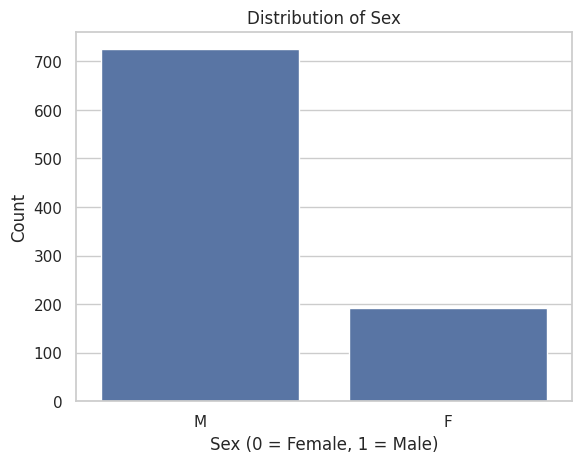

In [82]:
# Visualize the distribution of the 'Sex' column to check for gender balance
sns.countplot(x='Sex', data=data)
plt.title("Distribution of Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")  # Adjust labels based on encoding if applicable
plt.ylabel("Count")
plt.show()

# **Histograms for Numerical Features**

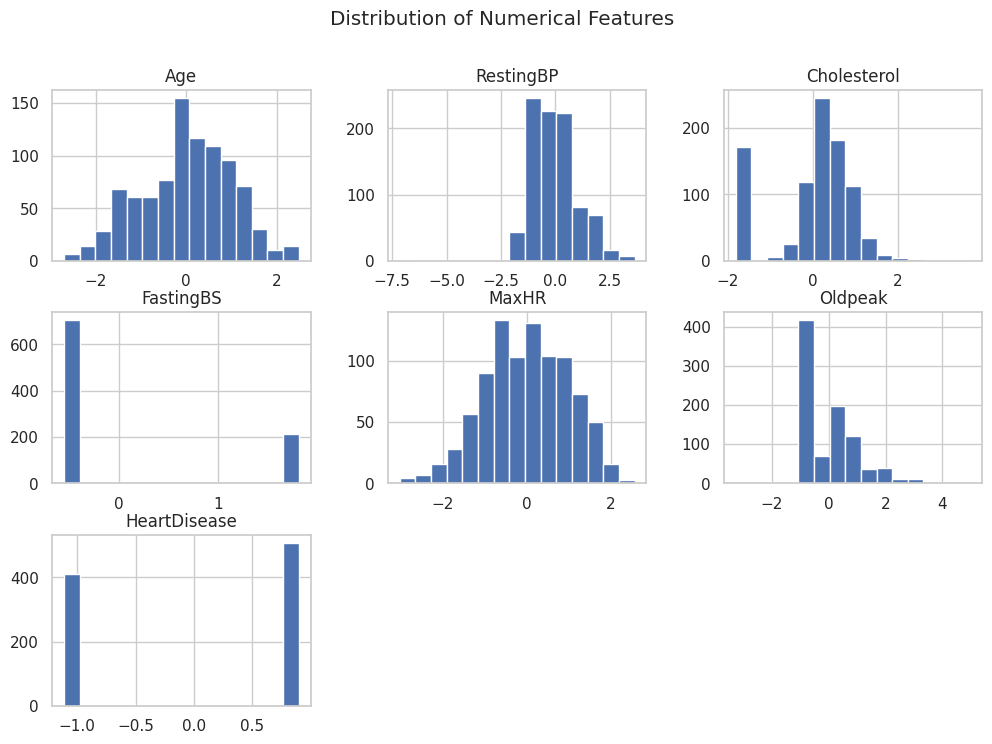

In [83]:
# Visualize the distribution of each numerical feature to identify skewness or outliers
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

data[numerical_features].hist(figsize=(12, 8), bins=15)
plt.suptitle("Distribution of Numerical Features")
plt.show()

# **Correlation Heatmap**

In [84]:
# Exclude non-numeric columns from correlation matrix
numeric_data = data.select_dtypes(include=[np.number])  # Keep only numeric columns

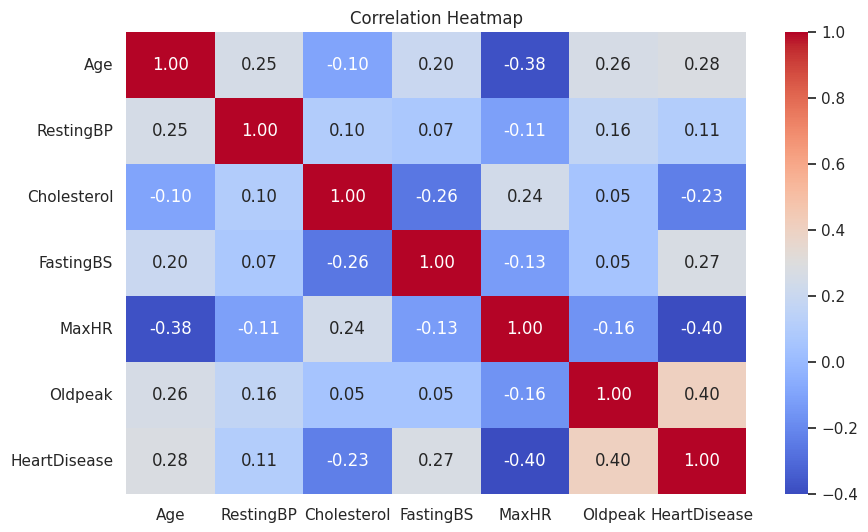

In [85]:
# Display correlation between numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

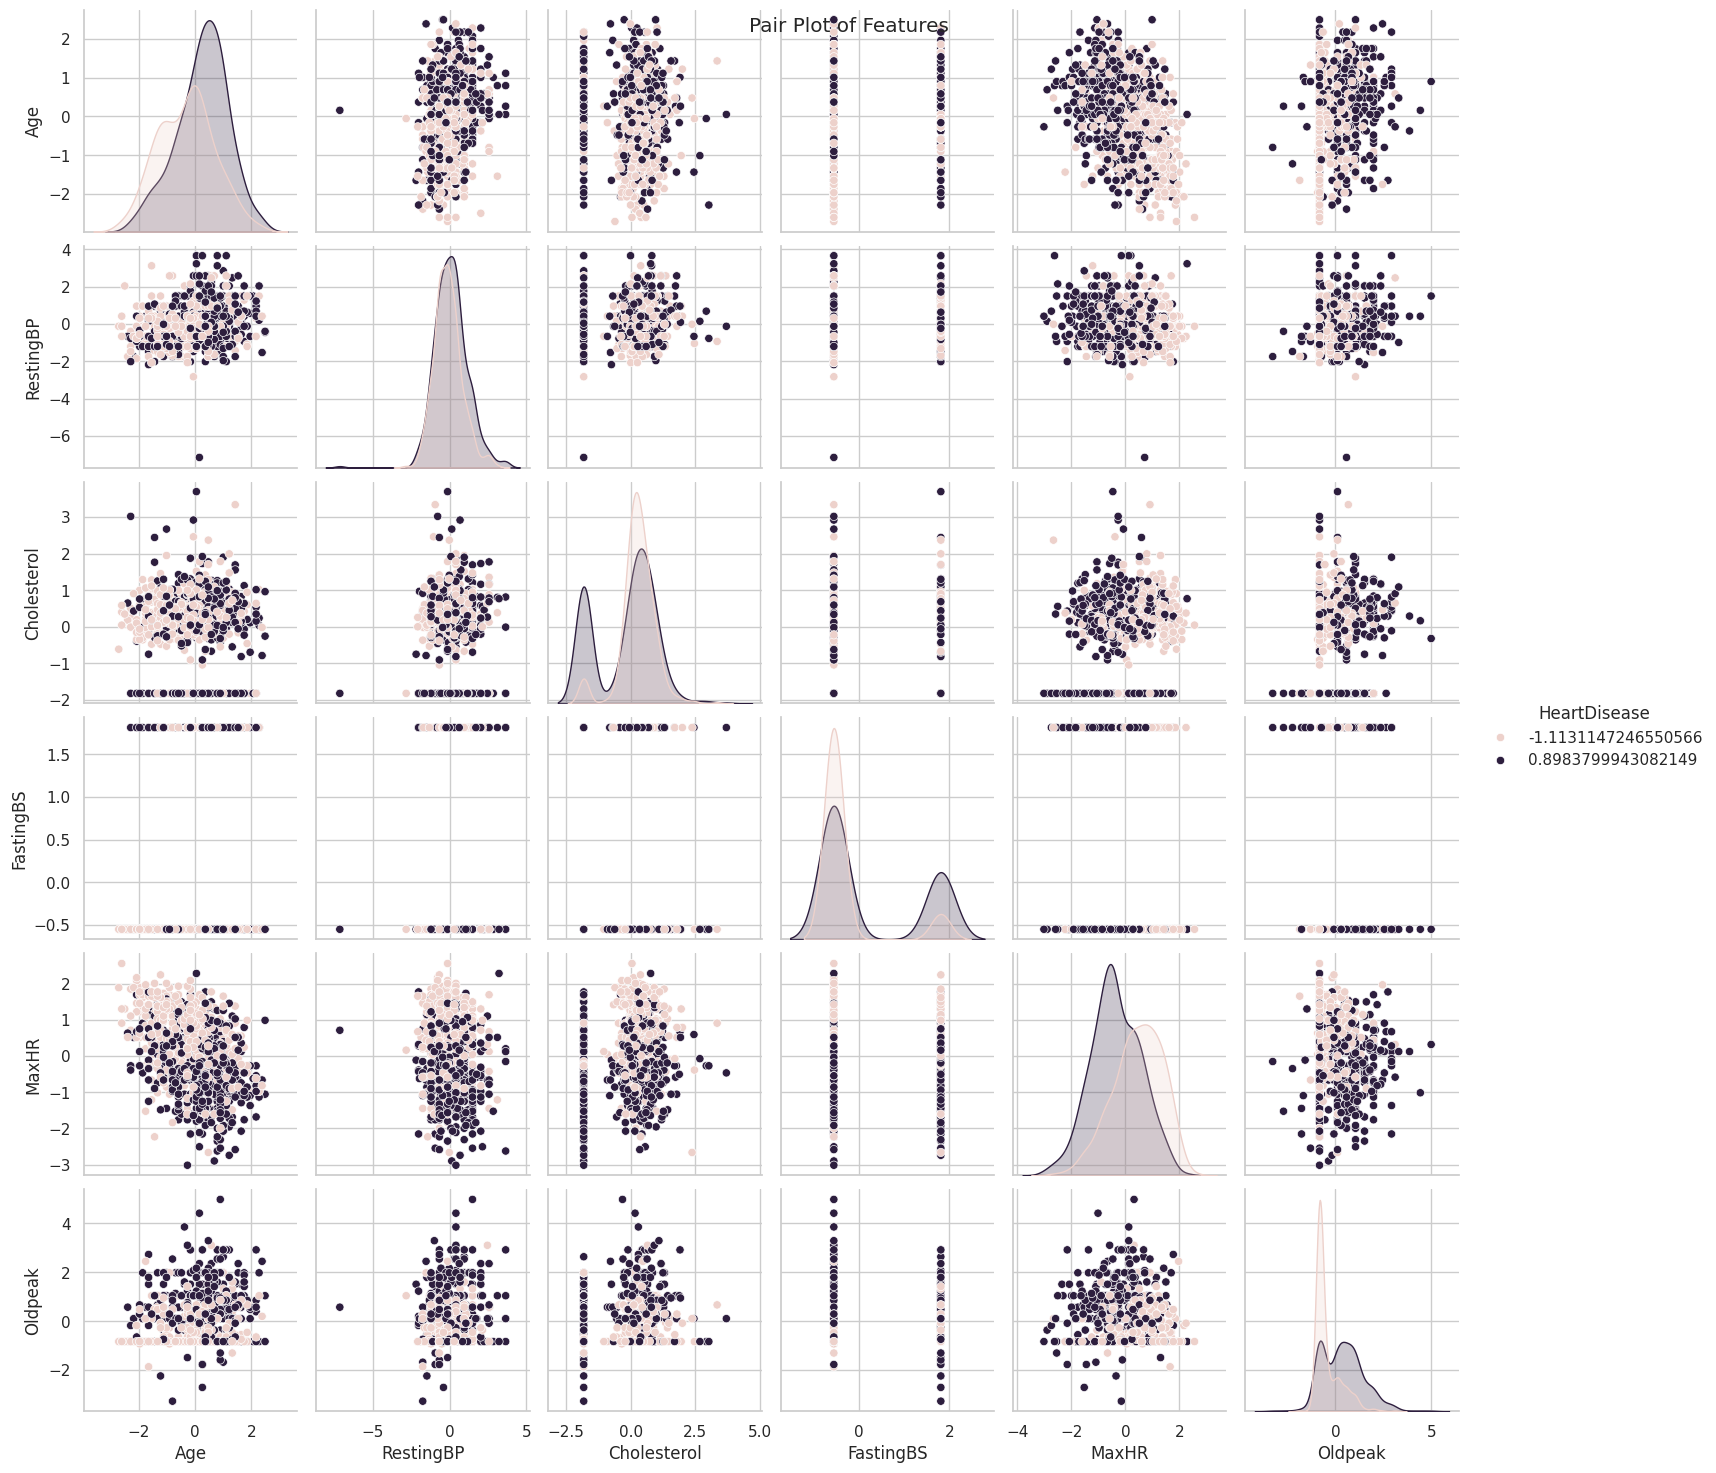

In [86]:
# For example, a high correlation between 'age' and 'target' may suggest that age is an important predictor for heart failure.
# Pair plot to observe relationships between features and their distributions for the target variable
sns.pairplot(data, hue=target_variable, diag_kind='kde')
plt.suptitle("Pair Plot of Features")
plt.show()

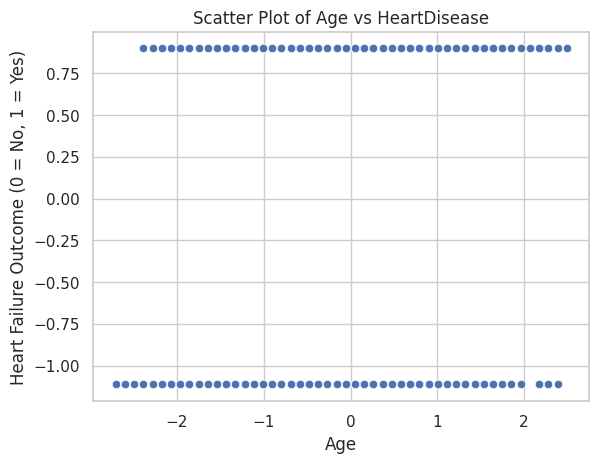

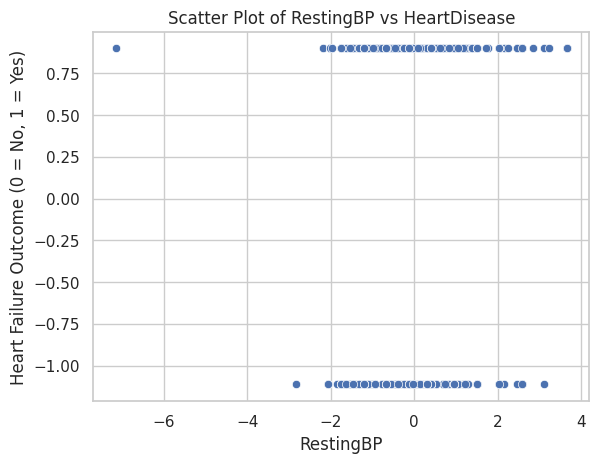

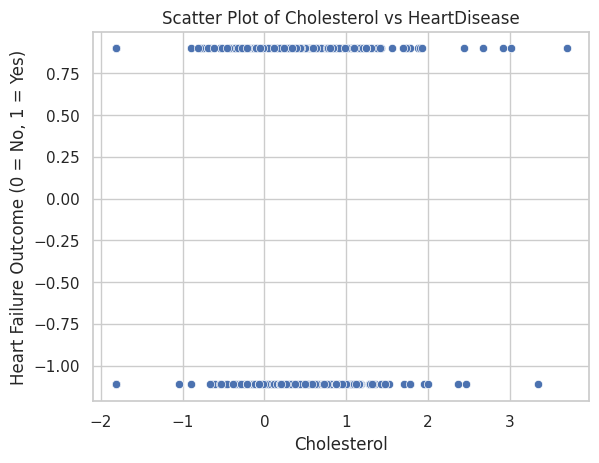

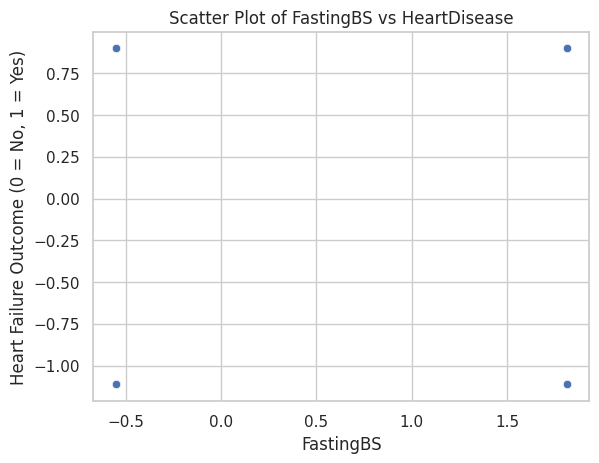

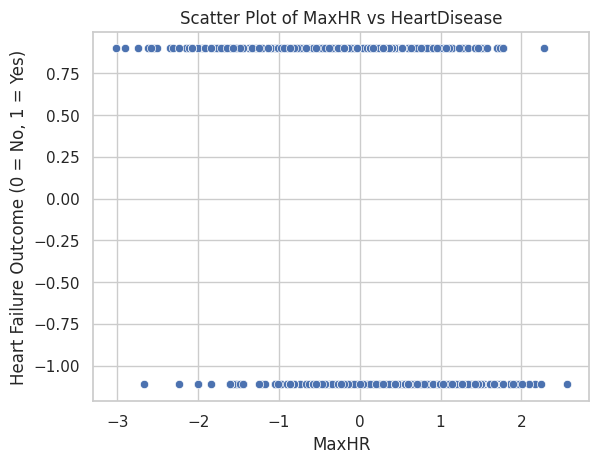

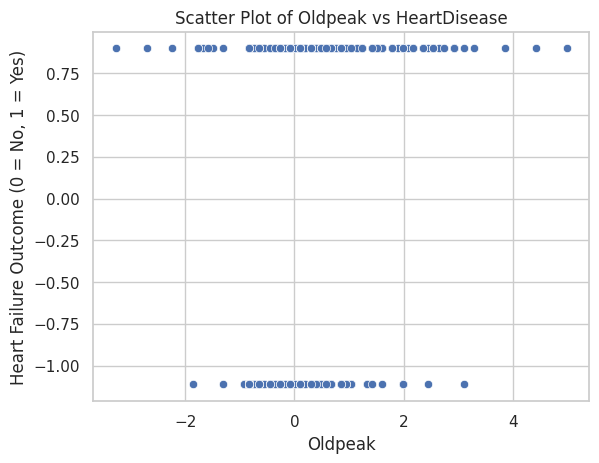

In [87]:
# Scatter Plots for Individual Features vs Target
# Scatter plots can reveal relationships between individual numerical features and the target variable
for feature in numerical_features:
    if feature != target_variable:  # Exclude target variable from scatter plot loop
        sns.scatterplot(x=feature, y=target_variable, data=data)
        plt.title(f"Scatter Plot of {feature} vs {target_variable}")
        plt.xlabel(feature)
        plt.ylabel("Heart Failure Outcome (0 = No, 1 = Yes)")
        plt.show()

# **Feature Engineering**

**Feature Creation**

In [88]:
# Interaction between 'age' and 'cholesterol'
# Creating an interaction term to capture the combined effect of age and cholesterol levels.
data['age_cholesterol_interaction'] = data['Age'] * data['Cholesterol']

# Binary feature for older age
# Creating a binary feature where 1 indicates age above a certain threshold (e.g., 60 years).
age_threshold = 60  # Define a threshold for "older age"
data['older_age'] = (data['Age'] > age_threshold).astype(int)

# Chest Pain Binary Encoding
# Simplifying chest pain categories by encoding a binary feature for typical angina (1 if typical angina, 0 otherwise).
data['typical_angina'] = (data['FastingBS'] == 'Typical Angina').astype(int)

# Display the first few rows to check new features
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_cholesterol_interaction,older_age,typical_angina
0,-1.433140,M,ATA,0.410909,0.825070,-0.551341,Normal,1.382928,N,-0.832432,Up,-1.113115,-1.182441,0,0
1,-0.478484,F,NAP,1.491752,-0.171961,-0.551341,Normal,0.754157,N,0.105664,Flat,0.898380,0.082281,0,0
2,-1.751359,M,ATA,-0.129513,0.770188,-0.551341,ST,-1.525138,N,-0.832432,Up,-1.113115,-1.348875,0,0
3,-0.584556,F,ASY,0.302825,0.139040,-0.551341,Normal,-1.132156,Y,0.574711,Flat,0.898380,-0.081276,0,0
4,0.051881,M,NAP,0.951331,-0.034755,-0.551341,Normal,-0.581981,N,-0.832432,Up,-1.113115,-0.001803,0,0


**Feature Selection**

In [89]:
print(data.columns)


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'age_cholesterol_interaction', 'older_age',
       'typical_angina'],
      dtype='object')


In [90]:
print("Unique values in target variable:", y.unique())

Unique values in target variable: [-1  0]


In [91]:
# Using feature importance from a model (e.g., RandomForest) to select relevant features

# Set 'HeartDisease' as the target variable for predicting heart disease outcomes
target_variable = 'HeartDisease'
y = data[target_variable]  # Define the target variable

# Drop the target and encode categorical variables for feature importance analysis
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
X = pd.get_dummies(data.drop(columns=[target_variable]), columns=categorical_features, drop_first=True)

# Convert the target variable to integer type if necessary
y = y.astype(int)

# Train a Random Forest model to get feature importances
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances and create a DataFrame for easy interpretation
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print("Feature Importance:\n", importance_df)


Feature Importance:
                         Feature  Importance
17                  ST_Slope_Up    0.165504
5                       Oldpeak    0.106376
4                         MaxHR    0.105110
16                ST_Slope_Flat    0.096259
2                   Cholesterol    0.091329
15             ExerciseAngina_Y    0.071644
6   age_cholesterol_interaction    0.071158
0                           Age    0.069362
1                     RestingBP    0.061484
9                         Sex_M    0.040827
10            ChestPainType_ATA    0.040452
11            ChestPainType_NAP    0.025397
3                     FastingBS    0.023636
13            RestingECG_Normal    0.014417
12             ChestPainType_TA    0.009191
14                RestingECG_ST    0.007853
8                typical_angina    0.000000
7                     older_age    0.000000


**Dropping Unimportant Features**

In [92]:
# Based on the feature importance scores, you may choose to drop features with very low importance.

# Dropping unimportant features can reduce model complexity and improve performance.

# Drop features with importance below a certain threshold
threshold = 0.01  # Define a threshold for importance
selected_features = importance_df[importance_df['Importance'] > threshold]['Feature'].tolist()

# Subset the data with selected features
X_selected = X[selected_features]  # X_selected will now contain only the important features

# Display the selected features
print("Selected Features based on Importance:\n", selected_features)

Selected Features based on Importance:
 ['ST_Slope_Up', 'Oldpeak', 'MaxHR', 'ST_Slope_Flat', 'Cholesterol', 'ExerciseAngina_Y', 'age_cholesterol_interaction', 'Age', 'RestingBP', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'FastingBS', 'RestingECG_Normal']


# **Data Splitting**

In [93]:
# Import required libraries for model training, evaluation, and visualization
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Training and Validation**

In [95]:
# Define models with relevant hyperparameters
models = {
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=200),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

In [96]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

# Train each model and validate using cross-validation
results = {}
for model_name, model in models.items():
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} Cross-Validation Accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std():.2f})")

    # Fit the model on training data and evaluate on test data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Adjust f1_score based on unique labels in y_test
    unique_labels = set(y_test.unique())
    pos_label = 1 if 1 in unique_labels else (0 if 0 in unique_labels else None)

    # Calculate probabilities for ROC AUC if available
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Store results for each model with conditional f1_score calculation
    results[model_name] = {
        'Model': model,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, pos_label=pos_label) if pos_label is not None else None,
        'ROC AUC': roc_auc_score(y_test, y_proba) if y_proba is not None and pos_label is not None else None
    }

# Display results
print("\nModel Evaluation Results:")
for model_name, metrics in results.items():
    print(f"\n{model_name}")
    print(f"  Accuracy: {metrics['Accuracy']:.2f}")
    print(f"  F1 Score: {metrics['F1 Score']:.2f}" if metrics['F1 Score'] is not None else "  F1 Score: Not applicable")
    print(f"  ROC AUC: {metrics['ROC AUC']:.2f}" if metrics['ROC AUC'] is not None else "  ROC AUC: Not applicable")


Random Forest Cross-Validation Accuracy: 0.87 (+/- 0.02)
Logistic Regression Cross-Validation Accuracy: 0.86 (+/- 0.03)
Support Vector Machine Cross-Validation Accuracy: 0.88 (+/- 0.02)
K-Nearest Neighbors Cross-Validation Accuracy: 0.85 (+/- 0.04)

Model Evaluation Results:

Random Forest
  Accuracy: 0.86
  F1 Score: 0.88
  ROC AUC: 0.93

Logistic Regression
  Accuracy: 0.86
  F1 Score: 0.88
  ROC AUC: 0.92

Support Vector Machine
  Accuracy: 0.85
  F1 Score: 0.87
  ROC AUC: 0.94

K-Nearest Neighbors
  Accuracy: 0.83
  F1 Score: 0.84
  ROC AUC: 0.91


**Evaluation Metrics and Visualization**


Best Model: Random Forest with Accuracy: 0.86


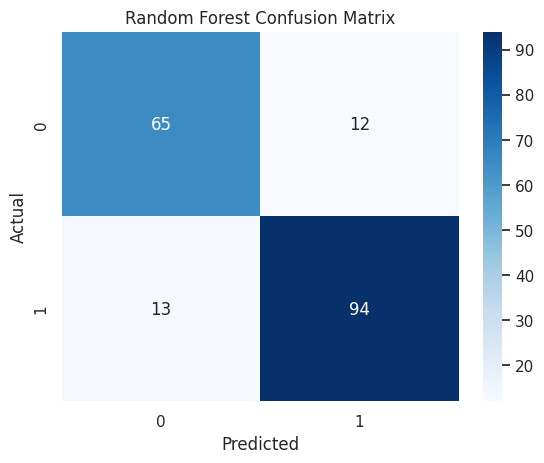

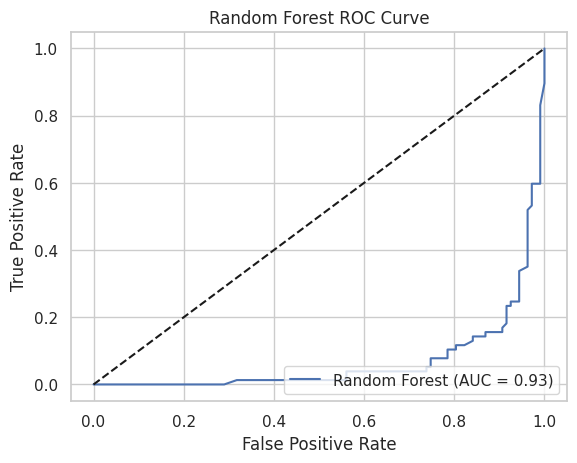

In [97]:
# Choose the best model for detailed evaluation
best_model_name = max(results, key=lambda x: results[x]['Accuracy'])
best_model = results[best_model_name]['Model']
print(f"\nBest Model: {best_model_name} with Accuracy: {results[best_model_name]['Accuracy']:.2f}")

# Confusion Matrix
y_pred_best = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title(f"{best_model_name} Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve for the best model (if probabilities are available)
if hasattr(best_model, "predict_proba"):
    y_proba_best = best_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba_best, pos_label=-1)  # Set pos_label to -1
    plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {roc_auc_score(y_test, y_proba_best):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{best_model_name} ROC Curve")
    plt.legend(loc="lower right")
    plt.show()